In [2]:
import pandas as pd
import numpy as np

## Get the one-time result

In [3]:
ldname = ['adult', 'balanced_credit_card', 'unbalanced_credit_card', 'encoded_adult']
lmname =['GaussianCopula', 'CTGAN', 'CopulaGAN', 'TVAE']
dfres = pd.DataFrame()
outpath = "../data/output/ES10HP/"
for m_name in ldname:
    for method_name in lmname:
        fname = outpath + m_name + "_" + method_name + "_clf_best_param_xgboost.csv"
        if not os.path.exists(fname):
            print(f"File '{fname}' does not exist. Skipping...")
            continue
        df = pd.read_csv(fname, index_col=0)
        ltuned = [df.loc['tuned_val_roc', 'Value'], df.loc['tuned_test_roc', 'Value']]
        luntuned = [df.loc['untuned_val_roc', 'Value'], df.loc['untuned_test_roc', 'Value']]
        lmodel =[method_name, method_name]
        ldata = [m_name, m_name]
        lset = ['val', 'test']
        dfres = pd.concat([dfres, pd.DataFrame([ldata, lmodel, lset, luntuned, ltuned],
                index = ['data', 'model', 'set', 'untuned', 'tuned']).T])

    for t in ['tuned', 'untuned']:
        fname = outpath + m_name + "_" + t + '_' +  "models_clf_best_param_xgboost.csv"
        if not os.path.exists(fname):
            print(f"File '{fname}' does not exist. Skipping...")
            continue
        df = pd.read_csv(fname, index_col=0)
        
        if t == 'tuned':
            ltuned = [df['val_roc'], df['test_roc']]
        else:
            luntuned = [df['val_roc'], df['test_roc']]
    lmodel =['SC-GOAT', 'SC_GOAT']
    ldata = [m_name, m_name]
    lset = ['val', 'test']
    dfres = pd.concat([dfres, pd.DataFrame([ldata, lmodel, lset, luntuned, ltuned],
            index = ['data', 'model', 'set', 'untuned', 'tuned']).T])


File '../data/output/ES10HP/adult_tuned_models_clf_best_param_xgboost.csv' does not exist. Skipping...
File '../data/output/ES10HP/adult_untuned_models_clf_best_param_xgboost.csv' does not exist. Skipping...
File '../data/output/ES10HP/balanced_credit_card_tuned_models_clf_best_param_xgboost.csv' does not exist. Skipping...
File '../data/output/ES10HP/balanced_credit_card_untuned_models_clf_best_param_xgboost.csv' does not exist. Skipping...
File '../data/output/ES10HP/unbalanced_credit_card_tuned_models_clf_best_param_xgboost.csv' does not exist. Skipping...
File '../data/output/ES10HP/unbalanced_credit_card_untuned_models_clf_best_param_xgboost.csv' does not exist. Skipping...
File '../data/output/ES10HP/encoded_adult_tuned_models_clf_best_param_xgboost.csv' does not exist. Skipping...
File '../data/output/ES10HP/encoded_adult_untuned_models_clf_best_param_xgboost.csv' does not exist. Skipping...


In [4]:
dfres.tuned = dfres.tuned.astype(float)
dfres.untuned = dfres.untuned.astype(float)
dfres['diff'] = dfres['tuned'] - dfres['untuned']
dfres.loc[dfres.set == 'test', ]
# dfres

,data,model,set,untuned,tuned,diff
1,adult,GaussianCopula,test,0.762358,0.762358,0.000000
1,adult,CTGAN,test,0.819527,0.857481,0.037955
1,adult,CopulaGAN,test,0.804897,0.832501,0.027603
1,adult,TVAE,test,0.848737,0.854666,0.005929
1,adult,SC_GOAT,test,0.848737,0.854666,0.005929
1,balanced_credit_card,GaussianCopula,test,0.931923,0.931923,0.000000
1,balanced_credit_card,CTGAN,test,0.944432,0.964681,0.020249
1,balanced_credit_card,CopulaGAN,test,0.954567,0.962612,0.008045
1,balanced_credit_card,TVAE,test,0.986016,0.986016,0.000000
1,balanced_credit_card,SC_GOAT,test,0.986016,0.986016,0.000000


## Get the Experiments

In [5]:
os.getcwd()

'/gpfs/gibbs/project/sekhon/sn576/Bayesian_Synthesizer/code'

In [6]:
ldname = ['adult', 'encoded_adult', 'credit_card_balanced50k', 'credit_card_unbalanced50k']
ldataname = ['adult', 'encoded_adult', 'balanced_credit_card', 'unbalanced_credit_card']
ldict = {k: v for k, v in zip(ldname, ldataname)}
lres = []
for d in ldname:
    dfCTGP = pd.read_csv('../CTAB-GAN-Plus/Experiments/' + d + '_CTABGAN_Result.csv')
    dfCTGP.rename(columns={'Unnamed: 0': 'experiment'}, inplace=True)
    dfCTGP['data'] = ldict[d]
    dfCTGP['method'] = 'CTabGANPlus'
    dfCTGP['untuned_val_auc'] = dfCTGP['AUC']
    dfCTGP['tuned_val_auc'] = dfCTGP['AUC']
    dfCTGP['untuned_test_auc'] = dfCTGP['AUC']
    dfCTGP['tuned_test_auc'] = dfCTGP['AUC']
    lres.append(dfCTGP)

dfCTab = pd.concat(lres, ignore_index=True)
dfCTab

,experiment,AUC,time,data,method,untuned_val_auc,tuned_val_auc,untuned_test_auc,tuned_test_auc
0,0,0.789306,1067.693750,adult,CTabGANPlus,0.789306,0.789306,0.789306,0.789306
1,1,0.858982,1068.925862,adult,CTabGANPlus,0.858982,0.858982,0.858982,0.858982
2,2,0.846320,1068.904680,adult,CTabGANPlus,0.846320,0.846320,0.846320,0.846320
3,3,0.871311,1068.354874,adult,CTabGANPlus,0.871311,0.871311,0.871311,0.871311
4,4,0.858785,1070.310633,adult,CTabGANPlus,0.858785,0.858785,0.858785,0.858785
5,5,0.804403,1068.637221,adult,CTabGANPlus,0.804403,0.804403,0.804403,0.804403
6,6,0.863021,1068.112773,adult,CTabGANPlus,0.863021,0.863021,0.863021,0.863021
7,7,0.841734,1072.112877,adult,CTabGANPlus,0.841734,0.841734,0.841734,0.841734
8,8,0.793299,1065.189170,adult,CTabGANPlus,0.793299,0.793299,0.793299,0.793299
9,9,0.797388,1064.098274,adult,CTabGANPlus,0.797388,0.797388,0.797388,0.797388


In [7]:
ldname = ['adult', 'balanced_credit_card', 'unbalanced_credit_card', 'encoded_adult']

dfres = pd.DataFrame()
outpath = "../data/outputDataAugmentation/"
lres = []
n_exp = 10
for exp in range(n_exp):
    for data in ldname:
        fname = outpath + 'experiment' + str(exp) + "_" + data + "_val_test_auc.csv"
        if not os.path.exists(fname):
            print(f"File '{fname}' does not exist. Skipping...")
            continue
        df = pd.read_csv(fname)
        df['data'] = data
        res = lres.append(df)
# lres.append(dfCTab.loc[:, df.columns])
dfF = pd.concat(lres, ignore_index=True)
dfF

,data,method,untuned_val_auc,tuned_val_auc,untuned_test_auc,tuned_test_auc,experiment
0,adult,GaussianCopula,0.723888,0.723888,0.721507,0.721507,0
1,adult,CTGAN,0.864542,0.851344,0.861771,0.853819,0
2,adult,CopulaGAN,0.817545,0.834437,0.811298,0.833867,0
3,adult,TVAE,0.840098,0.817034,0.834507,0.812302,0
4,adult,SC-GOAT,0.887660,0.889132,0.881849,0.880089,0
...,...,...,...,...,...,...,...
195,encoded_adult,GaussianCopula,0.821656,0.821656,0.826082,0.826082,9
196,encoded_adult,CTGAN,0.766893,0.780154,0.779792,0.795208,9
197,encoded_adult,CopulaGAN,0.766318,0.718813,0.761892,0.718770,9
198,encoded_adult,TVAE,0.830996,0.781621,0.832028,0.796324,9


In [8]:
# Calculate the row indices of the maximum 'untuned_val_auc' within each group
idx_min_u = dfF.groupby(['data', 'experiment'])['untuned_val_auc'].idxmax()

# Create a DataFrame containing the rows with the maximum 'untuned_val_auc' within each group
result_u = dfF.loc[idx_min_u, ['data', 'experiment', 'method', 'untuned_test_auc']]
result_u.columns = ['data', 'experiment', 'min_method_u', 'min_untuned_test_auc']

# Merge the DataFrame with the original DataFrame on 'data' and 'experiment'
dfc = dfF.merge(result_u, how='left', on=['data', 'experiment'])

# Update 'untuned_test_auc' column based on the condition
# dfc['untuned_test_auc'] = np.where(
#     (dfc['method'] == 'SC-GOAT') & (dfc['method'] != dfc['min_method_u']),
#     dfc['min_untuned_test_auc'],
#     dfc['untuned_test_auc']
# )

# Drop the additional columns from the intermediate result (optional)
dfc.drop(columns=['min_method_u', 'min_untuned_test_auc'], inplace=True)
dfF = dfc.copy()


#########################
# Now for the tuned
#########################
# Calculate the row indices of the maximum 'tuned_val_auc' within each group
idx_min_t = dfF.groupby(['data', 'experiment'])['tuned_val_auc'].idxmax()

# Create a DataFrame containing the rows with the maximum 'tuned_val_auc' within each group
result_t = dfF.loc[idx_min_t, ['data', 'experiment', 'method', 'tuned_test_auc']]
result_t.columns = ['data', 'experiment', 'min_method_t', 'min_tuned_test_auc']

# Merge the DataFrame with the original DataFrame on 'data' and 'experiment'
dfc = dfF.merge(result_t, how='left', on=['data', 'experiment'])
print(dfc.loc[(dfc['method'] == 'SC-GOAT') & (dfc['method'] != dfc['min_method_t']), ])
# Update 'tuned_test_auc' column based on the condition
# dfc['tuned_test_auc'] = np.where(
#     (dfc['method'] == 'SC-GOAT') & (dfc['method'] != dfc['min_method_t']),
#     dfc['min_tuned_test_auc'],
#     dfc['tuned_test_auc']
# )

# Drop the additional columns from the intermediate result (optional)
dfc.drop(columns=['min_method_t', 'min_tuned_test_auc'], inplace=True)
dfF = dfc.copy()
dfF = pd.concat([dfc, dfCTab.loc[:, dfF.columns]], axis=0)

                       data   method  untuned_val_auc  tuned_val_auc  \
9      balanced_credit_card  SC-GOAT         0.971142       0.976181   
14   unbalanced_credit_card  SC-GOAT         0.999833       0.999816   
29     balanced_credit_card  SC-GOAT         0.982423       0.977284   
49     balanced_credit_card  SC-GOAT         0.977575       0.973048   
69     balanced_credit_card  SC-GOAT         0.974484       0.975999   
89     balanced_credit_card  SC-GOAT         0.972039       0.972383   
109    balanced_credit_card  SC-GOAT         0.972393       0.979488   
129    balanced_credit_card  SC-GOAT         0.976382       0.976769   
149    balanced_credit_card  SC-GOAT         0.980336       0.976775   
169    balanced_credit_card  SC-GOAT         0.979117       0.977234   
189    balanced_credit_card  SC-GOAT         0.976779       0.977143   

     untuned_test_auc  tuned_test_auc  experiment    min_method_t  \
9            0.974971        0.979021           0            TVAE 

In [9]:
# Calculate the row indices of the maximum 'untuned_val_auc' within each group
idx_min_u = dfF.groupby(['data', 'experiment'])['untuned_val_auc'].idxmax()

# Create a DataFrame containing the rows with the maximum 'untuned_val_auc' within each group
result_u = dfF.loc[idx_min_u, ['data', 'experiment', 'method', 'untuned_test_auc']]
result_u.columns = ['data', 'experiment', 'min_method_u', 'min_untuned_test_auc']

# Merge the DataFrame with the original DataFrame on 'data' and 'experiment'
dfc = dfF.merge(result_u, how='left', on=['data', 'experiment'])

# Update 'untuned_test_auc' column based on the condition
dfc['untuned_test_auc'] = np.where(
    (dfc['method'] == 'SC-GOAT') & (dfc['method'] != dfc['min_method_u']),
    dfc['min_untuned_test_auc'],
    dfc['untuned_test_auc']
)

# Drop the additional columns from the intermediate result (optional)
dfc.drop(columns=['min_method_u', 'min_untuned_test_auc'], inplace=True)


In [14]:
dfF.loc[(dfF['method'] == 'TVAE') & (dfF['data'] == 'balanced_credit_card'), ['untuned_test_auc', 'tuned_test_auc', 'experiment']]

dfF['diff'] = dfF['tuned_test_auc'] - dfF['untuned_test_auc']
dftemp = dfF.groupby(['data', 'experiment'])['diff'].mean().reset_index()

dftemp = dftemp.sort_values(by = 'diff')
dftemp.groupby(["data"]).apply(lambda x: x.nsmallest(5, 'diff'))

dfF.loc[(dfF['data'] == 'balanced') & ((dfF['method'] == 'SC-GOAT') | (dfF['method'] == 'TVAE')), ].groupby(['data', 'method']).apply(lambda x: x.nsmallest(5, 'diff'))
# dfF.loc[(dfF['data'] == 'adult') & ((dfF['method'] == 'CTGAN') | (dfF['method'] == 'SC-GOAT') | (dfF['method'] == 'TVAE')), ].groupby(['data', 'method']).apply(lambda x: x.nlargest(5, 'diff'))
# dfbc.loc[((dfF['method'] == 'TVAE') | (dfF['method'] == 'SC-GOAT')| (dfF['method'] == 'CTGAN'),:].groupby(['data', 'method']).apply(lambda x: x.nsmallest(10, 'diff')).head(30)



,,data,method,untuned_val_auc,tuned_val_auc,untuned_test_auc,tuned_test_auc,experiment,diff
data,method,,,,,,,,


In [11]:
dfFinal = dfF.groupby(['data', 'method']).agg({
    'untuned_val_auc': ['mean', 'std'], 'tuned_val_auc': ['mean', 'std'],
    'untuned_test_auc': ['mean', 'std'], 'tuned_test_auc': ['mean', 'std'],
    }).reset_index()

def round_if_numeric(value):
    if isinstance(value, (int, float)):
        return round(value, 4)  # You can adjust the number of decimal places here
    return value

# Apply the round_if_numeric function to the whole DataFrame
dfFinal = dfFinal.applymap(round_if_numeric)
custom_order = ['GaussianCopula', 'CTGAN', 'CopulaGAN', "TVAE", 'CTabGANPlus', 'SC-GOAT']
dfFinal['method'] = pd.Categorical(dfFinal['method'], categories=custom_order, ordered=True)
dfFinal = dfFinal.sort_values(by=['data', 'method'])
df_tauc = dfFinal[['data', 'method', 'untuned_test_auc', 'tuned_test_auc']]

df_tauc.columns = df_tauc.columns.map('_'.join).str.strip('_')

df_tauc.to_csv("../Results/test_auc_experiments.csv", index=False)
df_tauc


,data,method,untuned_test_auc_mean,untuned_test_auc_std,tuned_test_auc_mean,tuned_test_auc_std
3,adult,GaussianCopula,0.7679,0.0332,0.7679,0.0332
0,adult,CTGAN,0.8351,0.0206,0.8349,0.0184
2,adult,CopulaGAN,0.7924,0.0390,0.8102,0.0227
5,adult,TVAE,0.8351,0.0172,0.8289,0.0148
1,adult,CTabGANPlus,0.8325,0.0325,0.8325,0.0325
4,adult,SC-GOAT,0.8817,0.0055,0.8781,0.0062
9,balanced_credit_card,GaussianCopula,0.9433,0.0066,0.9433,0.0066
6,balanced_credit_card,CTGAN,0.9493,0.0093,0.9585,0.0075
8,balanced_credit_card,CopulaGAN,0.9486,0.0096,0.9584,0.0105
11,balanced_credit_card,TVAE,0.9844,0.0029,0.9849,0.0032


In [12]:
import pandas as pd
from scipy.stats import ttest_ind

# Define the groups for comparison
lmname =['GaussianCopula', 'CTGAN', 'CopulaGAN', 'TVAE', 'CTabGANPlus']
# Perform one-sided t-test for each combination of columns in different groups
lres = []
for data in ldname:
    for method in lmname:
        scgoat_u = dfF.loc[(dfF['method'] == 'SC-GOAT') & (dfF['data'] == data), 'untuned_test_auc'].tolist()
        testing_u = dfF.loc[(dfF['method'] == method) & (dfF['data'] == data), 'untuned_test_auc'].tolist()
        scgoat_t = dfF.loc[(dfF['method'] == 'SC-GOAT') & (dfF['data'] == data), 'tuned_test_auc'].tolist()
        testing_t = dfF.loc[(dfF['method'] == method) & (dfF['data'] == data), 'tuned_test_auc'].tolist()
        t_stat_u, p_value_u = ttest_ind(scgoat_u, testing_u, alternative='greater')
        t_stat_t, p_value_t = ttest_ind(scgoat_t, testing_t, alternative='greater')
        lres.append([data, method, t_stat_u, round(p_value_u, 4), t_stat_t, round(p_value_t, 4)])
dft = pd.DataFrame(lres, columns=['data', 'method', 'untuned:tstat', 'untuned:pvalue', 'tuned:tstat', 'tuned:pvalue'])

custom_order = ['GaussianCopula', 'CTGAN', 'CopulaGAN', "TVAE", 'CTabGANPlus', 'SC-GOAT']
dft['method'] = pd.Categorical(dft['method'], categories=custom_order, ordered=True)
dft = dft.sort_values(by=['data', 'method'])
dft.to_csv("../Results/t-test.csv", index=False)

/gpfs/gibbs/project/sekhon/sn576/conda_envs/sdv/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [13]:
dfR = df_tauc.merge(dft, on = ['data', 'method'], how = 'left')
dfR.to_csv("../Results/t-test_test_auc.csv", index=False)
dft

,data,method,untuned:tstat,untuned:pvalue,tuned:tstat,tuned:pvalue
0,adult,GaussianCopula,10.699491,0.0000,10.322256,0.0000
1,adult,CTGAN,6.913661,0.0000,7.030504,0.0000
2,adult,CopulaGAN,7.161923,0.0000,9.138472,0.0000
3,adult,TVAE,8.170525,0.0000,9.692574,0.0000
4,adult,CTabGANPlus,4.718111,0.0001,4.354775,0.0002
5,balanced_credit_card,GaussianCopula,13.547097,0.0000,13.726220,0.0000
6,balanced_credit_card,CTGAN,8.403744,0.0000,6.740985,0.0000
7,balanced_credit_card,CopulaGAN,8.393416,0.0000,5.083770,0.0000
8,balanced_credit_card,TVAE,-5.331822,1.0000,-5.519279,1.0000
9,balanced_credit_card,CTabGANPlus,-2.280039,0.9825,-2.254490,0.9816


## Barchart

In [13]:
dfFinal.loc[dfFinal['data'] == 'adult', ('tuned_test_auc', 'mean')].to_list()

[0.7679, 0.8349, 0.8102, 0.8289, 0.8325, 0.8781]

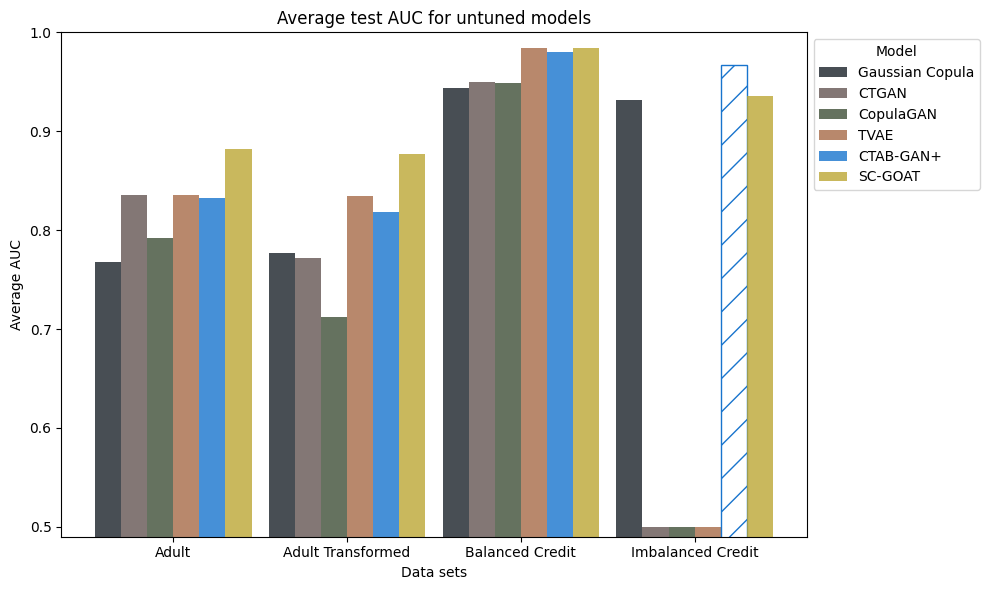

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (Replace this with your actual data)
datasets = ['Adult', 'Adult Transformed', 'Balanced Credit', 'Imbalanced Credit']

# groups = ['Group 1', 'Group 2', 'Group 3', 'Group 4']
groups = datasets
methods = ['Gaussian Copula', 'CTGAN', 'CopulaGAN', 'TVAE', 'CTAB-GAN+', 'SC-GOAT']

# subgroups = ['Subgroup 1', 'Subgroup 2', 'Subgroup 3', 'Subgroup 4', 'Subgroup 5']
subgroups = methods

adult_results_u = dfFinal.loc[dfFinal['data'] == 'adult', ('untuned_test_auc', 'mean')].to_list()
encoded_adult_results_u = dfFinal.loc[dfFinal['data'] == 'encoded_adult', ('untuned_test_auc', 'mean')].to_list()
balanced_credit_results_u = dfFinal.loc[dfFinal['data'] == 'balanced_credit_card', ('untuned_test_auc', 'mean')].to_list()
imbalanced_credit_results_u = dfFinal.loc[dfFinal['data'] == 'unbalanced_credit_card', ('untuned_test_auc', 'mean')].to_list()

adult_results_t = dfFinal.loc[dfFinal['data'] == 'adult', ('tuned_test_auc', 'mean')].to_list()
encoded_adult_results_t = dfFinal.loc[dfFinal['data'] == 'encoded_adult', ('tuned_test_auc', 'mean')].to_list()
balanced_credit_results_t = dfFinal.loc[dfFinal['data'] == 'balanced_credit_card', ('tuned_test_auc', 'mean')].to_list()
imbalanced_credit_results_t = dfFinal.loc[dfFinal['data'] == 'unbalanced_credit_card', ('tuned_test_auc', 'mean')].to_list()

data_u = [
    adult_results_u,  # Adult
    encoded_adult_results_u,  # Adult Transformed
    balanced_credit_results_u,   # Balanced Credit
    imbalanced_credit_results_u   # Imbalanced Credi
]

data_t = [
    adult_results_t,  # Adult
    encoded_adult_results_t,  # Adult Transformed
    balanced_credit_results_t,   # Balanced Credit
    imbalanced_credit_results_t   # Imbalanced Credi
]

# Number of groups and subgroups
num_groups = len(groups)
num_subgroups = len(subgroups)

# Width of each bar in the histogram
bar_width = 0.15
# Position of each bar on the x-axis
x_pos = np.arange(num_groups)

# colors_methods = {model_GaussianCopula : '#1A2229', model_CTGAN : '#645552', model_CopulaGAN : '#3F4F37', model_TVAE : '#A76B47', model_CGOAT : '#BCA734',
#          model_TunedCTGAN : '#645552', model_TunedCopulaGAN : '#3F4F37', model_TunedTVAE : '#A76B47', model_SCGOAT : '#BCA734', model_our_method : '#BCA734'}

# Define a list of colors for each subgroup
colors = ['#1A2229', '#645552', '#3F4F37', '#A76B47', '#1874CD','#BCA734']

# Plot the histogram
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(num_subgroups):
    # Calculate the x-position for each subgroup
    subgroup_x_pos = x_pos + i * bar_width - (num_subgroups - 1) * bar_width / 2
    # Plot the bars for each subgroup using a different color
    bars = ax.bar(subgroup_x_pos, [data_u[j][i] for j in range(num_groups)],
           width=bar_width, color=colors[i], alpha=0.8, label=subgroups[i])
    if i == num_subgroups - 2:
        bars[3].set_alpha(1)
        bars[3].set_hatch('/')
        bars[3].set_fill(False)
        bars[3].set_edgecolor(colors[i])

# Add labels and legend
ax.set_xlabel('Data sets')
plt.ylabel("Average AUC")
plt.title("Average test AUC for untuned models")
plt.ylim(0.49, 1)
#plt.yscale('log')
ax.set_xticks(x_pos)
ax.set_xticklabels(groups)
ax.legend(title='Model', loc='upper left', bbox_to_anchor=(1, 1))


# Show the plot
plt.tight_layout()
plt.show() 

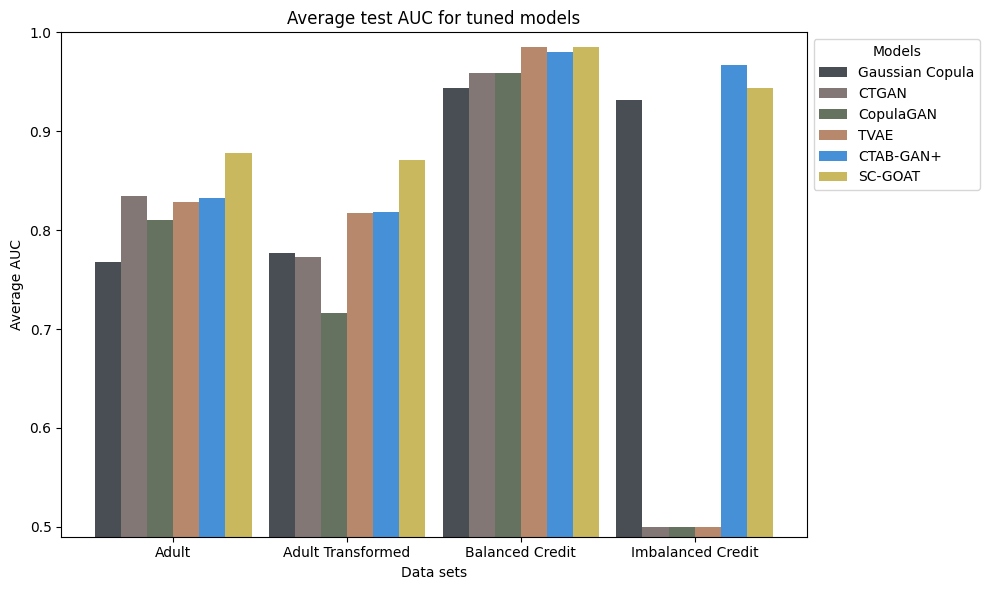

In [15]:
# Plot the histogram
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(num_subgroups):
    # Calculate the x-position for each subgroup
    subgroup_x_pos = x_pos + i * bar_width - (num_subgroups - 1) * bar_width / 2
    # Plot the bars for each subgroup using a different color
    ax.bar(subgroup_x_pos, [data_t[j][i] for j in range(num_groups)],
           width=bar_width, color=colors[i], alpha=0.8, label=subgroups[i])

# Add labels and legend
ax.set_xlabel('Data sets')
plt.ylabel("Average AUC")
plt.title("Average test AUC for tuned models")
plt.ylim(0.49, 1)
#plt.yscale('log')
ax.set_xticks(x_pos)
ax.set_xticklabels(groups)
ax.legend(title='Models', loc='upper left', bbox_to_anchor=(1, 1))


# Show the plot
plt.tight_layout()
plt.show() 

## Alphas

In [16]:
ldname = ['adult', 'balanced_credit_card', 'unbalanced_credit_card', 'encoded_adult']
lmethod = ['Gaussian Copula', 'CTGAN', 'CopulaGAN', 'TVAE']
dfres = pd.DataFrame()
outpath = "../data/outputDataAugmentation/"
lres = []
n_exp = 10
for exp in range(n_exp):
    for data in ldname:
        fname_u = outpath + 'experiment' + str(exp) + "_" + data + "_untuned__models_clf_best_param_xgboost.csv"
        fname_t = outpath + 'experiment' + str(exp) + "_" + data + "_tuned__models_clf_best_param_xgboost.csv"
        if not os.path.exists(fname_u):
            print(f"File '{fname_u}' does not exist. Skipping...")
            continue
        df_u = pd.read_csv(fname_u)
        df_t = pd.read_csv(fname_t)
        lalpha_u = df_u.loc[:, ['alpha_1', 'alpha_2', 'alpha_3', 'alpha_4']].T[0].to_list()
        lalpha_t = df_t.loc[:, ['alpha_1', 'alpha_2', 'alpha_3', 'alpha_4']].T[0].to_list()
        dft = pd.DataFrame({'data': data, 'method': lmethod, 'experiment': exp, 'tuned_alpha': lalpha_u, 'untuned_alpha':lalpha_t})
        lres.append(dft)
dfres = pd.concat(lres)

In [17]:
dfres = dfres.groupby(['data', 'method']).mean()
dfres[['tuned_alpha', 'untuned_alpha']].to_csv("../Results/mean_alpha.csv")
dfres

experiment  tuned_alpha  untuned_alpha
data                   method                                                 
adult                  CTGAN                   4.5     0.357833       0.325929
                       CopulaGAN               4.5     0.208111       0.260542
                       Gaussian Copula         4.5     0.237033       0.189584
                       TVAE                    4.5     0.197023       0.223946
balanced_credit_card   CTGAN                   4.5     0.012849       0.003897
                       CopulaGAN               4.5     0.002203       0.006154
                       Gaussian Copula         4.5     0.003857       0.046392
                       TVAE                    4.5     0.981092       0.943557
encoded_adult          CTGAN                   4.5     0.358930       0.309222
                       CopulaGAN               4.5     0.063981       0.131657
                       Gaussian Copula         4.5     0.274060       0.240225
                       TVAE                    4.5     0.303029       0.318895
unbalanced_credit_card CTGAN                   4.5     0.002215       0.001122
                       CopulaGAN               4.5     0.004970       0.001122
                       Gaussian Copula         4.5     0.961677       0.996633
                       TVAE                    4.5     0.031138       0.001122

In [19]:
dfres.groupby(['data']).sum()

,experiment,tuned_alpha,untuned_alpha
data,,,
adult,18.0,1.0,1.0
balanced_credit_card,18.0,1.0,1.0
encoded_adult,18.0,1.0,1.0
unbalanced_credit_card,18.0,1.0,1.0


## Proportions

In [20]:


ldname = ['adult', 'balanced_credit_card', 'unbalanced_credit_card', 'encoded_adult']
lmethod = ['GaussianCopula', 'CTGAN', 'CopulaGAN', 'TVAE']
dfres = pd.DataFrame()
outpath = "../data/output/ES10HP2/"
lres = []
n_exp = 10
for method in lmethod:
    for data in ldname:
        fname_u = outpath + data + '_untuned_' + method +  "_synthetic_data_xgboost.csv"
        fname_t = outpath + data + '_tuned_' + method +  "_synthetic_data_xgboost.csv"
        if not os.path.exists(fname_u):
            print(f"File '{fname_u}' does not exist. Skipping...")
            continue
        df_u = pd.read_csv(fname_u)
        df_t = pd.read_csv(fname_t)
        N = df_t.shape[0]
        if (data == 'balanced_credit_card') or (data == 'unbalanced_credit_card'):
            target = 'Class'
            n0u = sum(df_u[target] == 0)
            n1u = sum(df_u[target] == 1)
            n0t = sum(df_t[target] == 0)
            n1t = sum(df_t[target] == 1)
        else:
            target = 'income'
            n0u = sum(df_u[target] == 0)
            n1u = sum(df_u[target] == 1)
            n0t = sum(df_t[target] == 0)
            n1t = sum(df_t[target] == 1)
        
        lres.append([data, method, n0u/N, n1u/N, n0t/N, n1t/N])
dfres = pd.DataFrame(lres, columns=['data', 'method', 'untuned:class0', 'untuned:class1', 'tuned:class0', 'tuned:class1'])

In [21]:
dfres.sort_values(by = ['data', 'method']).to_csv('../Results/proportions.csv')


In [22]:
ldname = ['adult', 'balanced_credit_card', 'unbalanced_credit_card', 'encoded_adult']
lmethod = ['Gaussian Copula', 'CTGAN', 'CopulaGAN', 'TVAE']
dfres = pd.DataFrame()
outpath = "../data/outputDataAugmentation/"
lres = []
n_exp = 10

for exp in range(n_exp):
    for data in ldname:
        fname_u = outpath + 'experiment' + str(exp) + "_" + data + "_untuned_models_synthetic_data_xgboost.csv"
        fname_t = outpath + 'experiment' + str(exp) + "_" + data + "_tuned_models_synthetic_data_xgboost.csv"
        if not os.path.exists(fname_u):
            print(f"File '{fname_u}' does not exist. Skipping...")
            continue
        df_u = pd.read_csv(fname_u)
        df_t = pd.read_csv(fname_t)
        N = df_t.shape[0]
        if (data == 'balanced_credit_card') or (data == 'unbalanced_credit_card'):
            target = 'Class'
            n0u = sum(df_u[target] == 0)
            n1u = sum(df_u[target] == 1)
            n0t = sum(df_t[target] == 0)
            n1t = sum(df_t[target] == 1)
        else:
            target = 'income'
            n0u = sum(df_u[target] == ' <=50K')
            n1u = sum(df_u[target] == ' >50K')
            n0t = sum(df_t[target] == ' <=50K')
            n1t = sum(df_t[target] == ' >50K')

        lres.append([data, n0u/N, n1u/N, n0t/N, n1t/N, exp])
dfres = pd.DataFrame(lres, columns=['data', 'untuned:class0', 'untuned:class1', 'tuned:class0', 'tuned:class1', 'experiment'])
dfres

,data,untuned:class0,untuned:class1,tuned:class0,tuned:class1,experiment
0,adult,0.7765,0.2235,0.8162,0.1838,0
1,balanced_credit_card,0.6505,0.3495,0.6829,0.3171,0
2,unbalanced_credit_card,0.9980,0.0020,0.9980,0.0020,0
3,encoded_adult,0.7642,0.2358,0.7353,0.2647,0
4,adult,0.8320,0.1680,0.7948,0.2052,1
5,balanced_credit_card,0.6888,0.3112,0.6751,0.3249,1
6,unbalanced_credit_card,0.9981,0.0019,0.9981,0.0019,1
7,encoded_adult,0.7897,0.2103,0.7750,0.2250,1
8,adult,0.7766,0.2234,0.7329,0.2671,2
9,balanced_credit_card,0.7549,0.2451,0.7262,0.2738,2


In [23]:
dfres = dfres.groupby(['data']).mean()
dfres[['untuned:class0', 'untuned:class1', 'tuned:class0', 'tuned:class1']].to_csv("../Results/propSC-GOAT.csv")
dfres[['untuned:class0', 'untuned:class1', 'tuned:class0', 'tuned:class1']]

,untuned:class0,untuned:class1,tuned:class0,tuned:class1
data,,,,
adult,0.78473,0.21527,0.77412,0.22588
balanced_credit_card,0.70188,0.29812,0.72930,0.27070
encoded_adult,0.76257,0.23743,0.76236,0.23764
unbalanced_credit_card,0.99647,0.00353,0.99647,0.00353


In [24]:
dfres.columns
df_u[target].unique()

array([' <=50K', ' >50K'], dtype=object)